# PHYS 219 - Pre-Lab 04 - Data Entry

Lab 04 and many of your remaining labs will use data that you acquire by hand on the oscilloscope and need to enter point-by-point in a CSV file. This pre-lab gives you some initial practice at the data entry, and working with some new functions.

If you are using the phys229 Jupyter Hub server (highly recommended), or have already installed the data_entry2 package on a local install when taking PHYS119, you can skip the next section which describes how to install. Otherwise, proceed...

# Installing data_entry2 (ignore if using the phys229 server)

You need to begin by installing a data entry package developed by Professor Carl Michal for the PHYS 119 lab. Many of you will have used this before. Once you have run this once, you will probably not need to do it again. To avoid seeing the installation messages any more, you can comment the three lines of code out with # in front of the line, and re-run the cell.

A few tips:
* if you are using Anaconda, you may have some issues with the ipywidgets package; based on experience, the best approach is to create a new environment with a minimal install of python, Jupyter, and numpy.
* in an anaconda terminal window, install ipydatagrid by entering the command `conda install conda-forge::ipydatagrid`
* then pip install data_entry2 as below which will add any other dependencies
* then add matplotlib which you will also need (I did this last, and had trouble the other way around, so try this)
* after all this, you may have shortcuts defined for your numerical entry 1 thru 6, which obviously doesn't work for entering numerical data. For a summary of how to change these see: https://towardsdatascience.com/customizing-jupyter-lab-shortcuts-6857492647d2
* if all else fails, or this seems like too much... use our server where everything is installed and tested...

# Running the Data Entry Code

Any time you want to run the data entry code, you begin by importing two packages: 'numpy' and 'data_entry2.

When you run this, you will see a simple spreadsheet appear, and also a new CSV file will appear in the directory that you are using. You can choose a different name for the CSV file.

For your first practice with this, you will be entering the results from your Experiment 02. The format will be the same as you other CSV files so far - four columns containing x-variable, uncertainty in the x variable, y-variable, and the uncertainty in the y-variable. 

For this pre-lab, enter your Lab 02 results for the time constant $\tau$ from varying resistance. So, resistance is the x-variable, and the decay time tau ($\tau$) is the y-variable. We have already entered column heading for you in the file 'lab04_prelab_data.csv', you just need to enter your data. For large or small numbers, you can enter scientific notation with an "e" to denote $\times10^{something}$. So, 0.002 can be entered as "2e-3".

As you enter your data, the CSV file is automatically updated. When you are done, you can click on the CSV file in your directory and view it.

In [1]:
import numpy as py
import data_entry2

In [6]:
de = data_entry2.sheet("lab04_prelab_data")

Sheet name: lab04_prelab_data.csv


## Plotting Your Data

We include here a simple code used for just plotting your data with error bars, so that you can view the data that you just entered. You should add axis labels and a title.

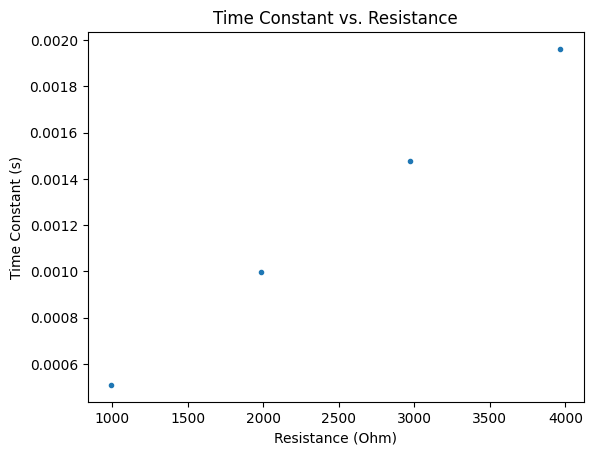

In [3]:
# import the  library numpy  and rename it  np
import numpy as np
import array

# import the library matplotlib and rename it plot
import matplotlib.pyplot as plt
#name  the input file  with the data
fname = 'lab04_prelab_data.csv'

# This block reads in data - the file is assumed to be in csv format (comma separated variables). 
# Files need to be specified with a full path OR they have to be saved in the same folder as the script
# 
data = np.loadtxt(fname, delimiter=',', comments='#',usecols=(0,1,2,3),skiprows=2)

# generate an array which is the first column of data.  Note the first column is 
# indexed as zero.
x = data[:,0]
# generate an array for the x uncertainty  (column index  1)
x_sigma = data[:,1]
# generate an array for the y values (column index 2)
y = data[:,2]
# generate an array for y uncertainty (column index 3) 
y_sigma = data[:,3]

# This block creates a plot

plt.errorbar(x,y,xerr=x_sigma,yerr=y_sigma,marker='.',linestyle='',label="measured data")
plt.xlabel('Resistance (Ohm)')
plt.ylabel('Time Constant (s)')
plt.title('Time Constant vs. Resistance')
plt.show()

# The new functions

You will be working with 2 new functions this week that describe the response of the circuit to a sinusoidal voltage as a function of frequency. Let's practice plotting these functions so we can take a look at their functional form. You should also explore how dense data points will need to be, and what range of frequencies are reasonable to explore for the component values you'll be working with so you are ready to work efficiently in the lab.

## RC response curve

The RC response curve follows the form:
$$V_c(f)=\frac{V_{in}^0}{\sqrt{1+(2\pi fRC)^2}}$$

We need to define new function where f -> x, and RC -> tau, and $V_{in}^0$ -> V0

```python
def RCresp_func(x, tau, V0):
    return V0/(1+(2*np.pi*tau*x)**2)
```

This function has been entered below. Check over the code block and make sure you have the right set of parameters, and enter some reasonable initial parameters (try calculating from the nominal values given in the instructions for Experiment 4 or from your measurements in Experiments 2 and 3), and change the frequency range and point spacing to get a sense of how you will determine your measurement space. 

Keep in mind that you will be taking measurements "by hand", so you will have limited time to collect data: 500 points might be a nice starting place to see the function here, but you will want to limit your collection to what you have time and patience for (maybe 20-40 points). In the lab you aren't constrained to take data at equally spaced intervals, so this will also help you see where to focus your time.

To finish this section, make sure your final plots show:
* response function with a reasonable set of parameters with justification (calculated either from nominal values or from your measurements)
* a reasonable range of frequency to capture the functional form
* a density of data points that captures the functional form, but is achievable when taking data (add a note if you plan to change the density of the data points in different regions

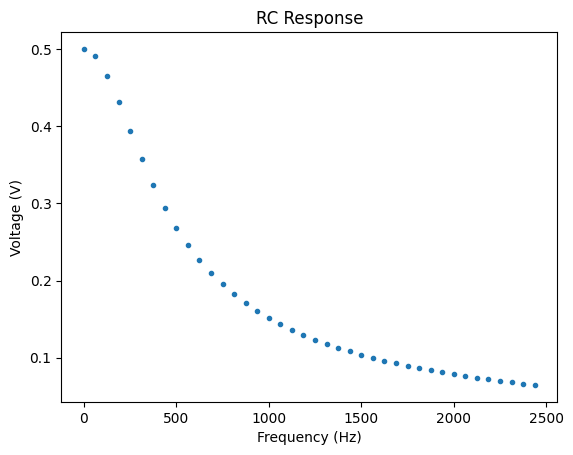

In [4]:
# Code to calculate and plot the response function

# import the  necessary libraries and rename them
import numpy as np
import array
import pandas as pd
import matplotlib.pyplot as plt

# Define the Functions for the RC and LRC responses

def RCresp_func(x, tau, V0):
    return V0/np.sqrt(1+(2*np.pi*tau*x)**2)

def LRCresp_func(x, f0, Vin, gamma):
    return Vin/(np.sqrt(1+(2*np.pi/(gamma*x))**2*(x**2-f0**2)**2))

# Select the fit function, define the Parameter Names, and give them numerical values

fit_function = RCresp_func
param_names = ["tau","V0"]
guesses = (500e-6,0.5)

# Set the frequency range to plot over and number of points

min_f=0
max_f=2500
npts=40

# Define a set of x values that will be used for the calculation
# Note that in your fitting code, x is defined differently 
#  - do not change that part of the fitting code when you get there.

x = np.arange(min_f, max_f, (max_f-min_f)/npts)

y_model = RCresp_func(x, *guesses)

plt.plot(x,y_model,".")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Voltage (V)")
plt.title("RC Response")

plt.show()

**Observations:**

I picked the following parameters:

- $\tau = 500$ $\mu s$ because at $R=1000$ Ohms with $C=500$ nF, in Experiment 2, this is the expected time constant $RC$.
- $V0 = 1 V$ because I performed Lab 2 (all rounds) at a $1$ V (peak to peak) amplitude, so this would allow me to verify the response graph based on my raw data curve from round 1 of lab 2.
- $f \in [0,4000]$ Hz because I wanted to be able to see the full extent of the decay curve as much as I could (there seems to be an inflection point for the graph around 1000, so the bulk of the curve is determined by 2500 Hz)
- I only used 40 points because that's realistic to in-lab.

## LRC response curve

For the LRC circuit we need to plot the amplitude vs. frequency for the resonantor, which is expected to follow:
$$V_R^0(f)=\frac{V_{in}^0}{\sqrt{1+(\frac{2\pi}{\gamma f})^2(f^2-f_0^2)^2}}$$
with f -> x, $\gamma$ -> gamma, $V_{in}^0$ -> Vin, and $f_0$ -> f0

This is defined below as:

```python
def LRCresp_func(x, f0, Vin, gamma):
    return Vin/(np.sqrt(1+(2*np.pi/(gamma*x))**2*(x**2-f0**2)**2))
```

In the code block below, change the function from the RC response to LRC response, and similarly enter some reasonable parameters (based on nominal component values or your recent measurements), and test some different point spacing and frequency range to see how you might plan out a measurement. Your final plot should reflect a reasonable parameter set, frequency range, and density of points as above for the RC response curve.

gamma 1085339.1684901533


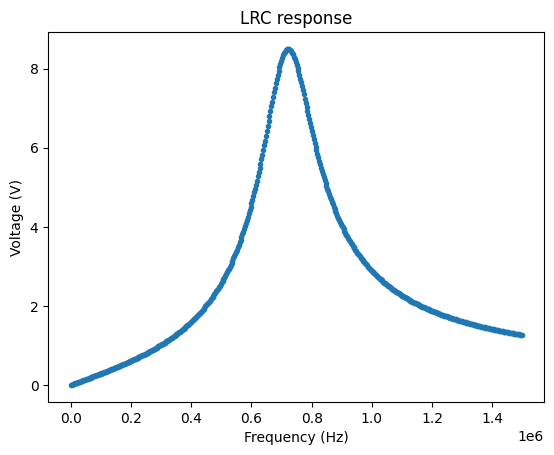

In [5]:
# Code to calculate and plot the response function

# import the  necessary libraries and rename them
import numpy as np
import array
import pandas as pd
import matplotlib.pyplot as plt

# Define the Functions for the RC and LRC responses

def RCresp_func(x, tau, V0):
    return V0/np.sqrt(1+(2*np.pi*tau*x)**2)

def LRCresp_func(x, f0, Vin, gamma):
    return Vin/(np.sqrt(1+(2*np.pi/(gamma*x))**2*(x**2-f0**2)**2))

# Select the fit function, define the Parameter Names, and give them numerical values

resistance=992
inductance=457e-6
gamma_guess=resistance/(2*inductance)
print('gamma',gamma_guess)

fit_function = LRCresp_func
param_names = ['f0','Vin','gamma']
guesses = (722000,8.5,gamma_guess)

# Set the frequency range to plot over and number of points

min_f=1
max_f=1.5e6
npts=500

# Define a set of x values that will be used for the calculation
# Note that in your fitting code, x is defined differently 
#  - do not change that part of the fitting code when you get there.

x = np.arange(min_f, max_f, (max_f-min_f)/npts)

y_model = LRCresp_func(x, *guesses)

plt.plot(x,y_model,".")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Voltage (V)")
plt.title("LRC response")

plt.show()

**Notes**

- I used $\gamma = R/2L \approx 1.08 \times 10^{6}$ based on my actual values of $R=992$ Ohms and $L=457 \times 10^{-6}$ H.
- I used $V_in=8$ V because that's directly from my amplitudes on the previous lab.
- I used $f_0=7.22$ MHz based on my direct lab 3 data, and to get the full graph outlook, I set the scale to $f \in (0,1.5]$ MHz.

That's it for this pre-lab. In the lab you'll be taking lots of measurements from the oscilloscope, and entering it manually. It's a good idea to plot as you go to make sure you're getting enough data points in the right regions, and you haven't made an obvious data entry error. 